In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [161]:

def backtracking(f, grad_f, x):
    alpha = 1
    c = 0.8
    tau = 0.25

    while f(x - alpha * grad_f(x)) > f(x) - c * alpha * np.linalg.norm(grad_f(x)) ** 2:
        alpha = tau * alpha

        if alpha < 1e-3:
            break

    return alpha


def gradient_descent(f, grad_f, x0, kmax, tolf, tolx,backtrack,alpha=1e-2):
   
    k=0
    
    x = np.zeros((len(x0),kmax))
    x[:,k] = x0

    f_val = np.zeros((kmax))
    f_val[k] = f(x0)
    
    err_val = np.zeros(kmax)
    err_val[k] = np.linalg.norm(grad_f(x0))

    grads = np.zeros((len(x0),kmax))
    grads[:,k] = grad_f(x0)
    if(backtrack):
            alpha = backtracking(f, grad_f, x[:,k])

    while ( np.linalg.norm(grad_f(x[:,k])) >= tolf and k < kmax-1):
        if(backtrack):
            alpha = backtracking(f, grad_f, x[:,k])
        step = alpha * grad_f(x[:,k])
        x[:,k+1] = x[:,k] - step
        f_val[k+1] = f(x[:,k+1])
        err_val[k+1] = np.linalg.norm(grad_f(x[:,k+1]))
        grads[:,k+1] = grad_f(x[:,k+1])
        if(np.linalg.norm( x[:,k+1] - x[:,k], 2) < tolx ):
            break
        k = k+1
    return x[:,:k], k, f_val[:k], grads[:,:k], err_val[:k]
    







In [172]:
def plot_GD(x, k, f_val, grads, err_val, f, error=True, title="Countour plot and gradient descent steps"):
    xv_plot = np.linspace(-10, 10, 100)
    yv_plot = np.linspace(-10, 10, 100)
    xx, yy = np.meshgrid(xv_plot, yv_plot)
    zz_plot = f([xx,yy])
    
    plt.figure(figsize=(15, 6))

    ax1 = plt.subplot(1, 2, 1)
    ax1.plot(x[0,:k],x[1,:k],"--ro")
    ax1.contour(xx, yy, zz_plot)
    plt.title(title)
    ax1.set_xlabel("x1")
    ax1.set_ylabel("x2")
    plt.grid()

    if(error == True):
        x_err_plot = np.linspace(0,k,k)
        ax2 = plt.subplot(1, 2, 2)
        ax2.plot(x_err_plot, err_val)
        plt.title("Error")
        ax2.set_ylabel("error")
        ax2.set_xlabel("iterations")
        plt.grid()

    plt.show()
    print("Iterations: ",k)
    print("solution: ",x[:,-1])

def plot_GD_2D(x, k, f_val, grads, err_val, f, back=False, error=True, title="Plot and gradient descent steps"):
    if(back == True):
        title = title + " with backtracking"
    x_plot = np.linspace(-3, 3, 100)
    y_plot = []
    for element in x_plot:
        y_plot.append(f([element]))
    
    plt.figure(figsize=(15, 6))

    ax1 = plt.subplot(1, 2, 1)
    ax1.plot(x_plot,y_plot)
    ax1.plot(x[0,:],f_val,"--ro")
    plt.title(title)
    ax1.set_xlabel("x1")
    ax1.set_ylabel("x2")
    plt.grid()

    if(error == True):
        x_err_plot = np.linspace(0,k,k)
        ax2 = plt.subplot(1, 2, 2)
        ax2.plot(x_err_plot, err_val)
        plt.title("Error")
        ax2.set_ylabel("error")
        ax2.set_xlabel("iterations")
        plt.grid()

    plt.show()
    print("Iterations: ",k)
    print("solution: [",x[0,-1],f_val[-1],"]")

def plot_error(x,k, x_star, title="Plot of the error"):
    error = [0] * k
    j = 0
    while j<k:
        error[j] = np.linalg.norm(x[:,j] - x_star, 2)
        j += 1
    plt.title("||x_k - x*||_2")
    plt.xlabel("K")
    plt.ylabel(" ||x_k - x*||_2 ")
    plt.plot(error)
    
def plot_vand(f, grad_f, n, x_star, alpha):
    
    x0 = np.zeros((n,))
    kmax = 100
    tolf = 10**(-7)
    tolx = 10**(-8)

    x, k, f_val, grads, err = gradient_descent(f, grad_f, x0, kmax, tolf, tolx, False, alpha)
    x_back, k_back, f_val_back, grads_back, err_back = gradient_descent(f, grad_f, x0, kmax, tolf, tolx, True)
    
    
    plt.figure(figsize=(10, 6))
    
    plt.suptitle("Vandermonde dimension: "+str(n)+ " ALPHA = " + str(alpha))
    plt.plot(range(0,k),err, label = "no backtracking: "+str(k)+" iterations" )
    plt.plot(range(0,k_back),err_back, label = "backtracking: "+ str(k_back)+ " iterations")
    
    #plt.set_yscale('log')
    plt.legend(loc='upper left')

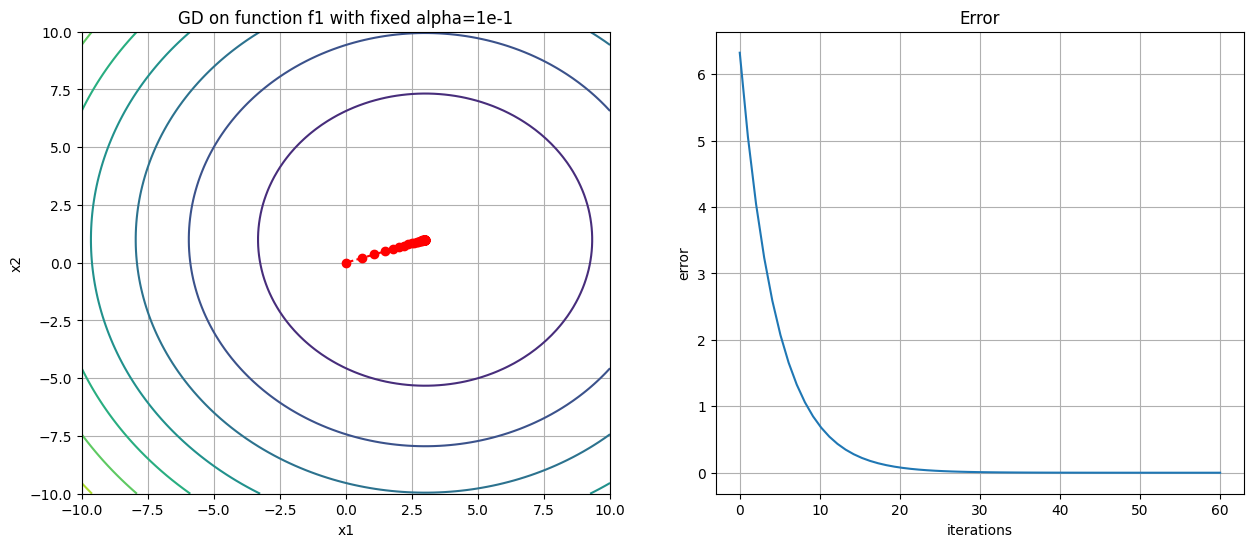

Iterations:  60
solution:  [2.99999425 0.99999808]


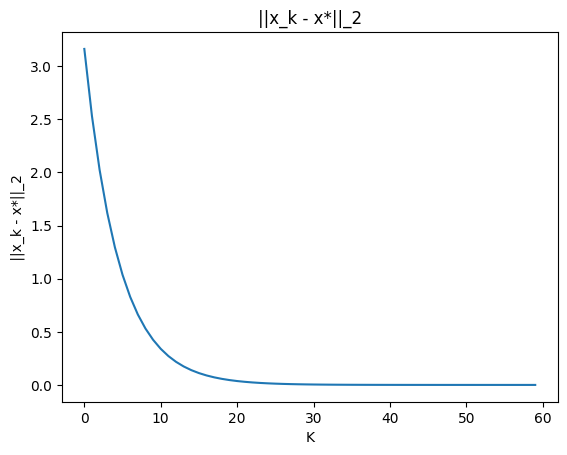

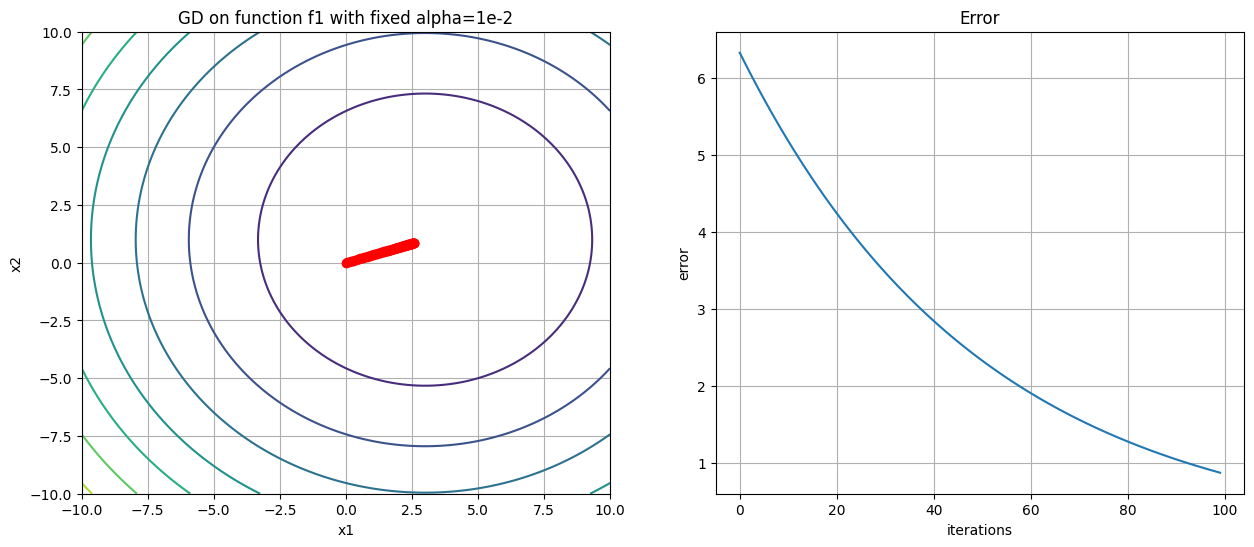

Iterations:  99
solution:  [2.5857365  0.86191217]


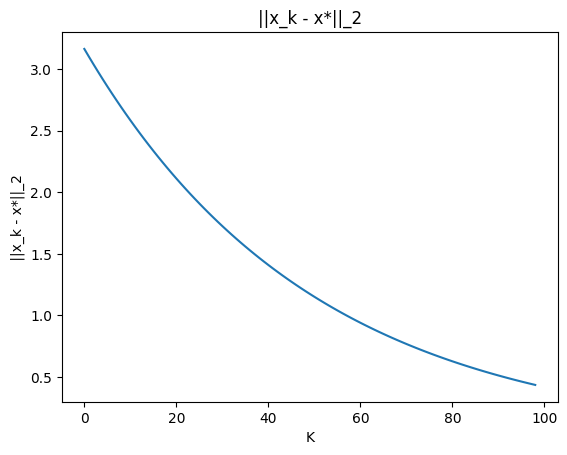

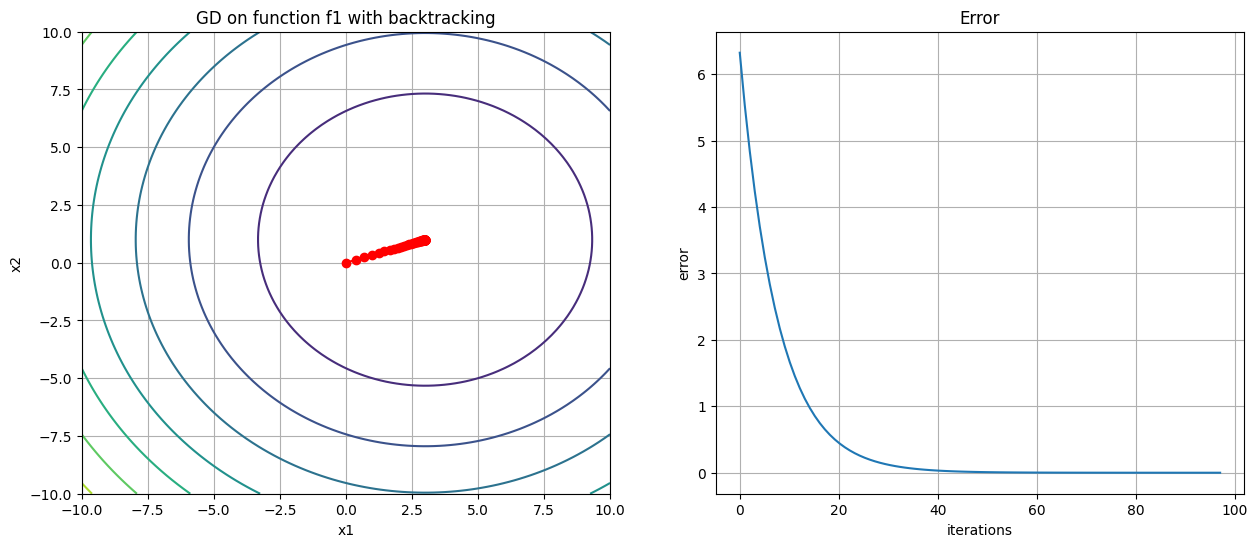

Iterations:  97
solution:  [2.99999187 0.99999729]


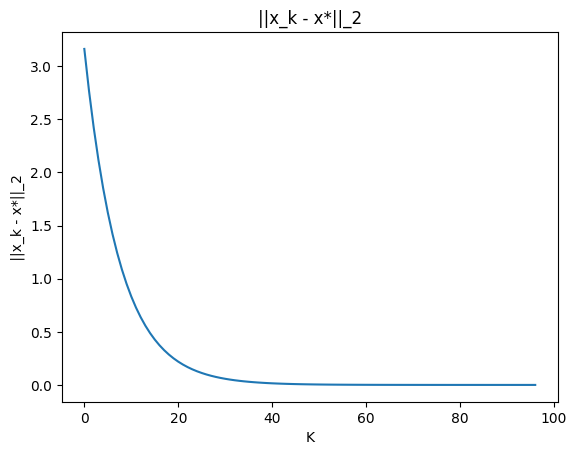

In [163]:
def f1(x):
    return (x[0]-3)**2 + (x[1]-1)**2


def grad_f1(x):
    return np.array([(2*x[0]-6), (2*x[1]-2)])

x_star = np.array([[3,1]])
n = 2
x0 = np.zeros((n,))
tolf = 1e-6
tolx = 1e-6
maxk = 100

x, k, f_val, grads, err_val = gradient_descent(f1, grad_f1, x0,maxk, tolf, tolx, backtrack=False, alpha=1e-1)
plot_GD(x, k, f_val, grads, err_val, f1, title="GD on function f1 with fixed alpha=1e-1")
plot_error(x,k,x_star)


x, k, f_val, grads, err_val = gradient_descent(f1, grad_f1, x0,maxk, tolf, tolx,  backtrack=False, alpha=1e-2)
plot_GD(x, k, f_val, grads, err_val, f1, title="GD on function f1 with fixed alpha=1e-2")
plot_error(x,k,x_star)

x0 = np.zeros((n,))
tolf = 1e-6
tolx = 1e-6
maxk = 100
x, k, f_val, grads, err_val = gradient_descent(f1, grad_f1, x0, maxk, tolf, tolx, backtrack=True,alpha=0.001)
plot_GD(x, k, f_val, grads, err_val, f1, title="GD on function f1 with backtracking")
plot_error(x,k,x_star)

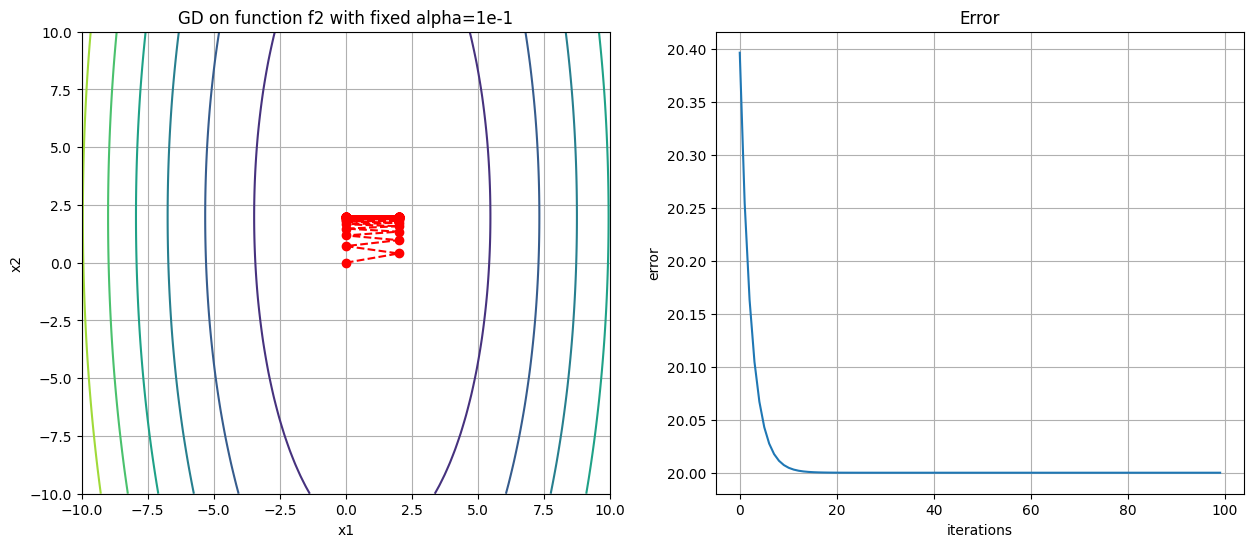

Iterations:  99
solution:  [0. 2.]


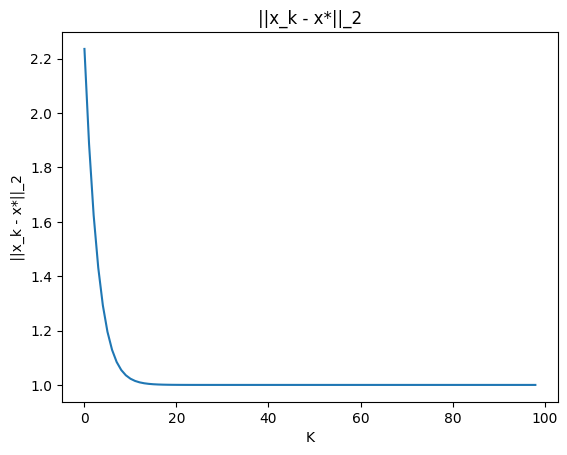

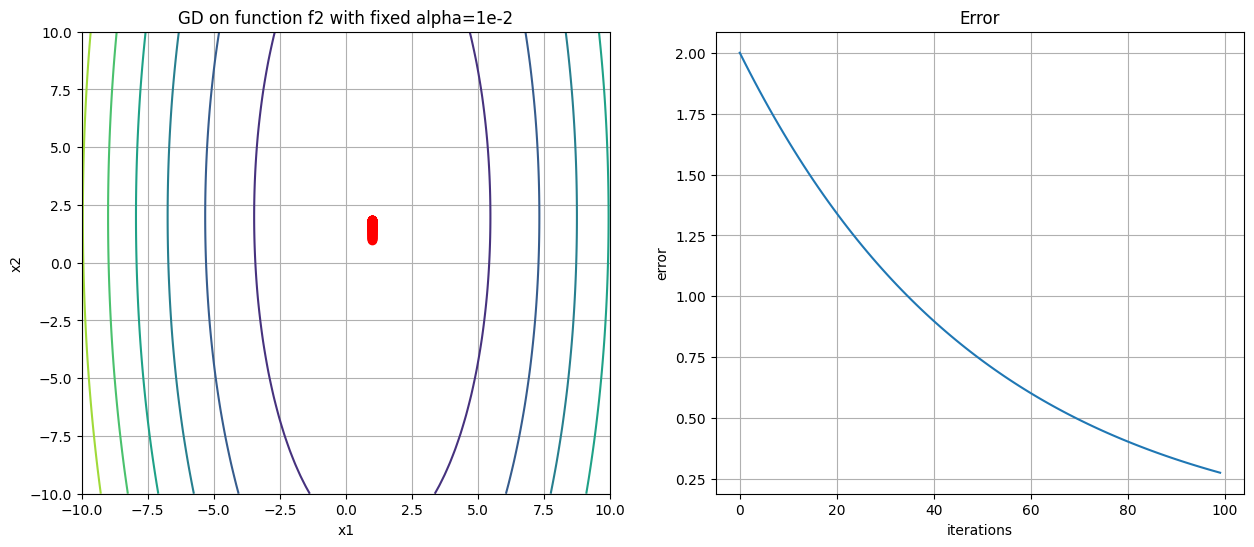

Iterations:  99
solution:  [1.         1.86191217]


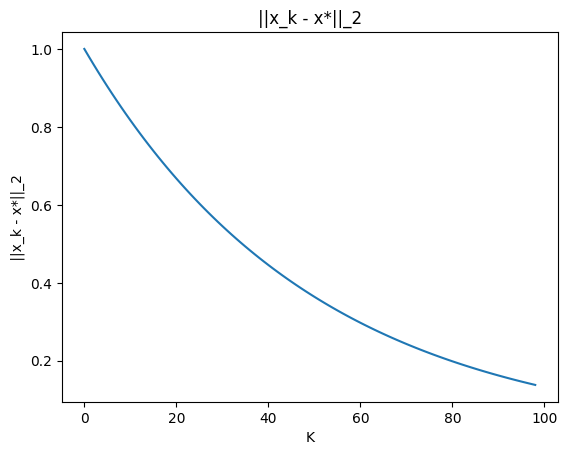

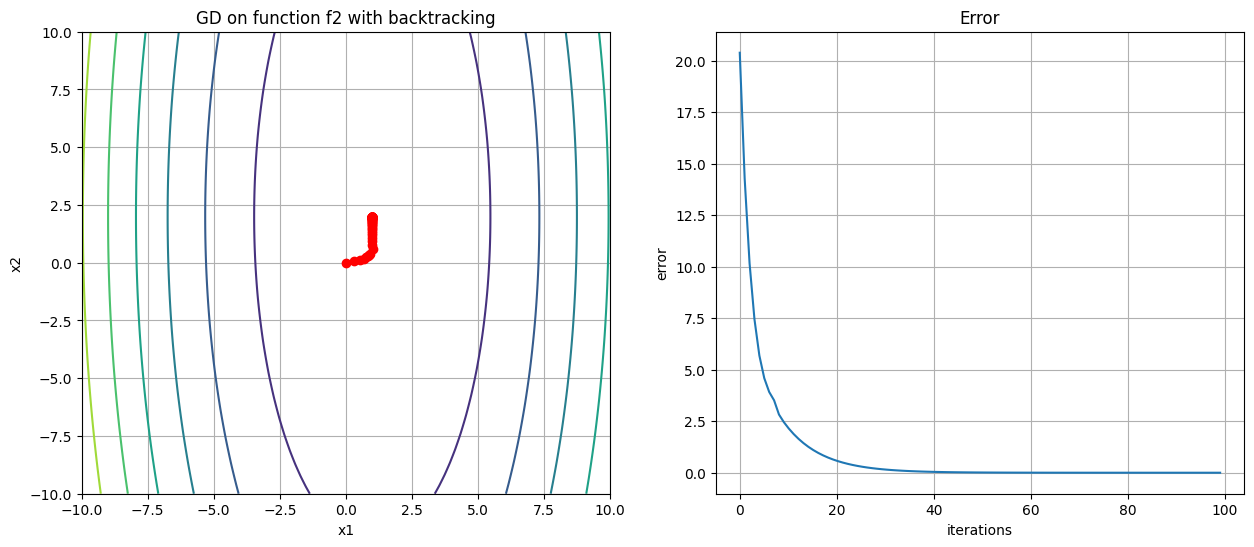

Iterations:  99
solution:  [1.         1.99999154]


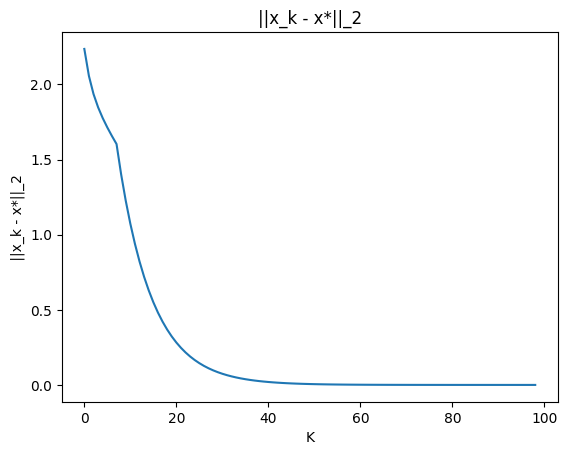

In [164]:

def f2(x):
    return 10*(x[0]-1)**2 + (x[1]-2)**2

def grad_f2(x):
    return np.array([(20*x[0]-20), (2*x[1]-4)])

x_star = np.array([[1,2]])
x0 = [0,0]
tolf = 1e-6
tolx = 1e-6
maxk = 100

x, k, f_val, grads, err_val = gradient_descent(f2, grad_f2, x0, maxk, tolf, tolx,  backtrack=False, alpha=1e-1)
plot_GD(x, k, f_val, grads, err_val, f2, title="GD on function f2 with fixed alpha=1e-1")
plot_error(x,k,x_star)
x0 = [1,1]
tolf = 1e-6
tolx = 1e-6
maxk = 100

x, k, f_val, grads, err_val = gradient_descent(f2, grad_f2, x0, maxk, tolf, tolx,  backtrack=False, alpha=1e-2)
plot_GD(x, k, f_val, grads, err_val, f2, title="GD on function f2 with fixed alpha=1e-2")
plot_error(x,k,x_star)
x0 = [0,0]
tolf = 1e-6
tolx = 1e-6
maxk = 100
x, k, f_val, grads, err_val = gradient_descent(f2, grad_f2, x0, maxk, tolf, tolx, backtrack=True,alpha=1e-2)
plot_GD(x, k, f_val, grads, err_val, f2, title="GD on function f2 with backtracking")
plot_error(x,k,x_star)

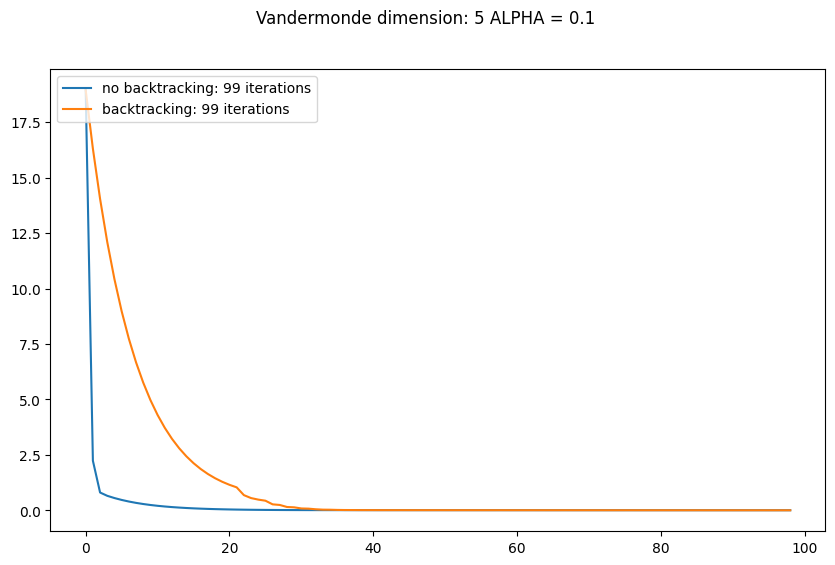

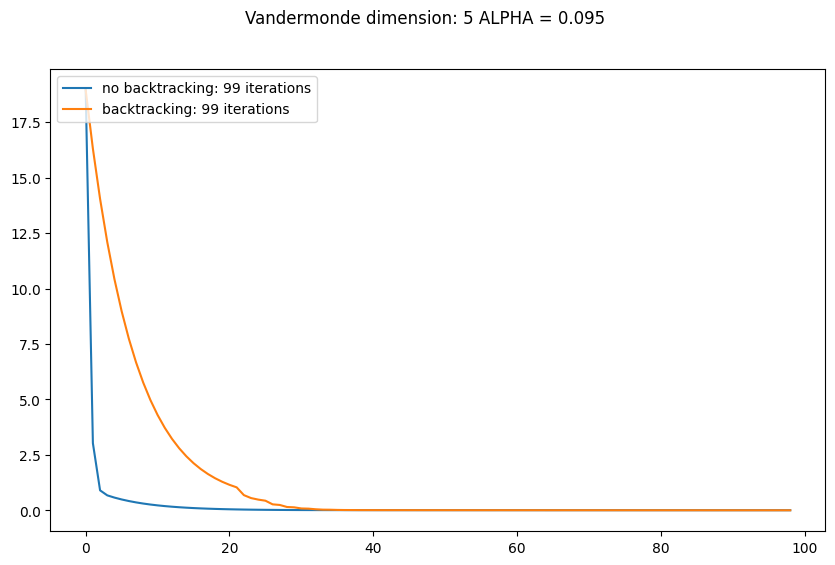

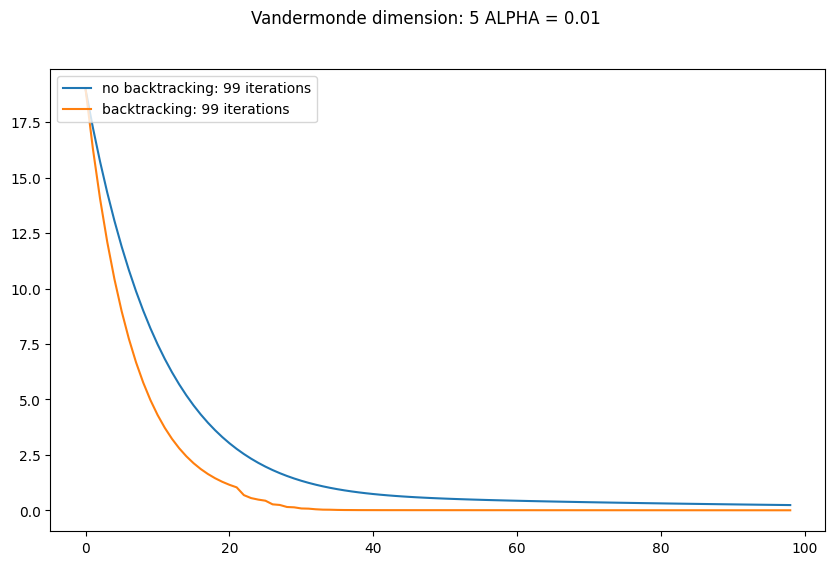

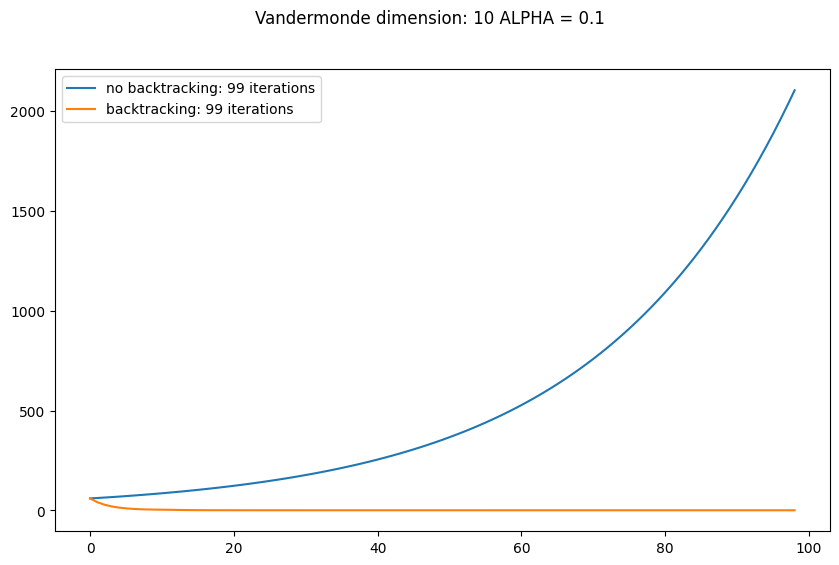

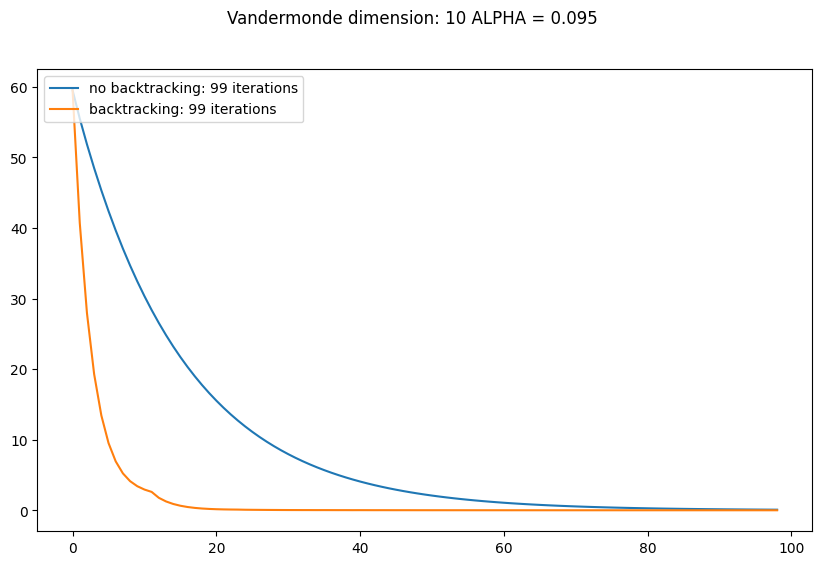

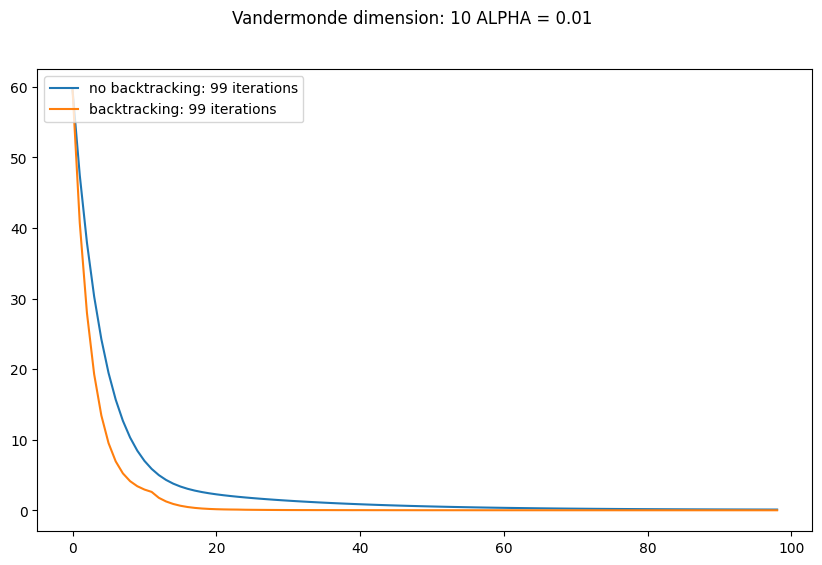

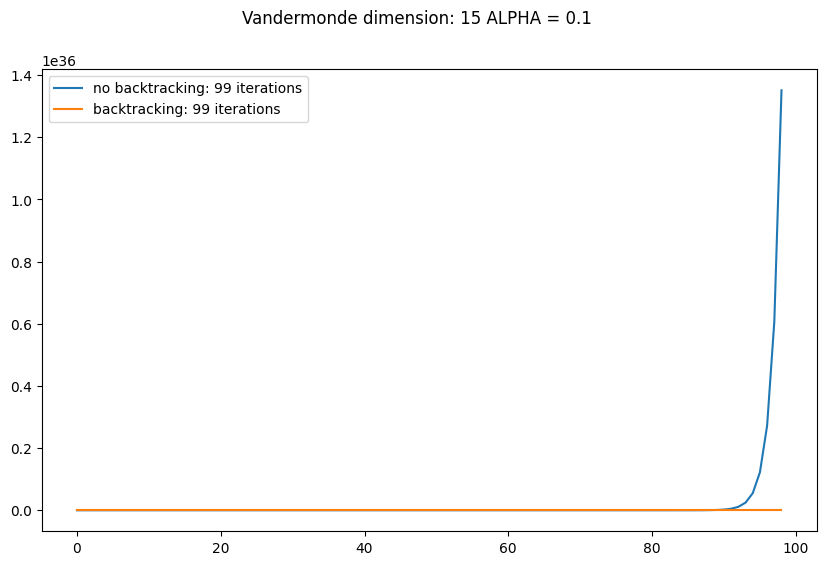

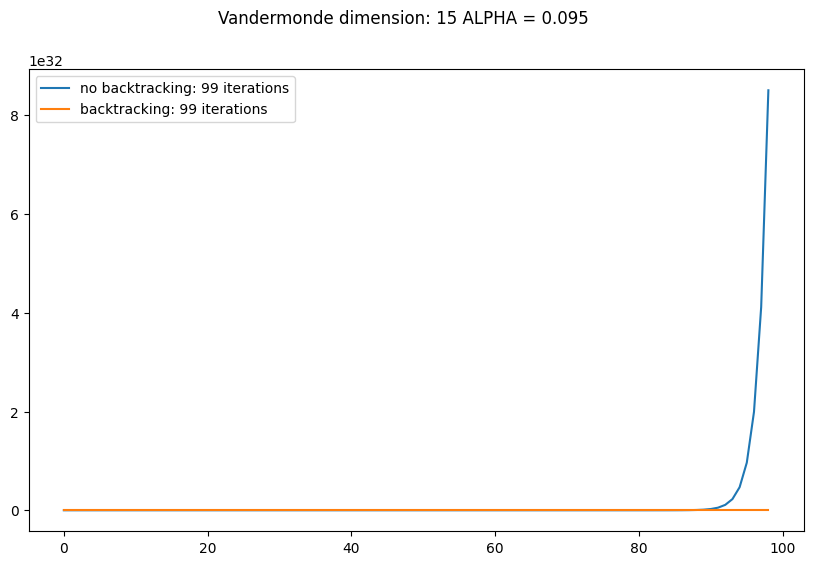

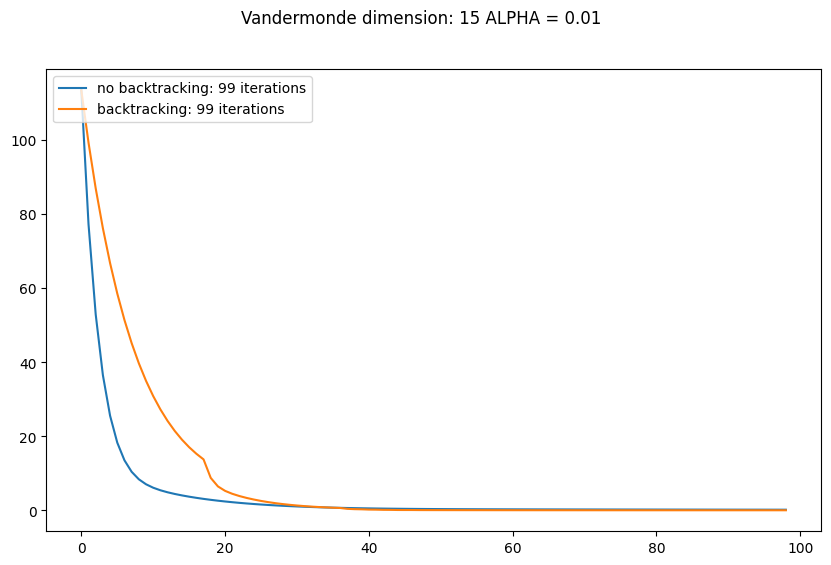

In [176]:
kmax = 100
x0 = np.array([0,0])
n=5 
v = np.linspace(0,1,n)
A = np.vander(v)
x_true = np.ones((n,))
b = A@x_true

def f3(x):

    return 0.5*(np.linalg.norm((A@x)-b, 2)**2)


def grad_f3(x):
    return (x.T @ A.T - b.T) @ A


plot_vand(f3, grad_f3, n, x_true, 0.1)
plot_vand(f3, grad_f3, n, x_true, 0.0950)
plot_vand(f3, grad_f3, n, x_true, 0.01)

n=10 
v = np.linspace(0,1,n)
A = np.vander(v)
x_true = np.ones((n,))
b = A@x_true

plot_vand(f3, grad_f3, n, x_true, 0.1)
plot_vand(f3, grad_f3, n, x_true, 0.0950)
plot_vand(f3, grad_f3, n, x_true, 0.01)

n=15 
v = np.linspace(0,1,n)
A = np.vander(v)
x_true = np.ones((n,))
b = A@x_true

plot_vand(f3, grad_f3, n, x_true, 0.1)
plot_vand(f3, grad_f3, n, x_true, 0.0950)
plot_vand(f3, grad_f3, n, x_true, 0.01)


Lambda:  0.05
Lambda:  0.4
Lambda:  1.9


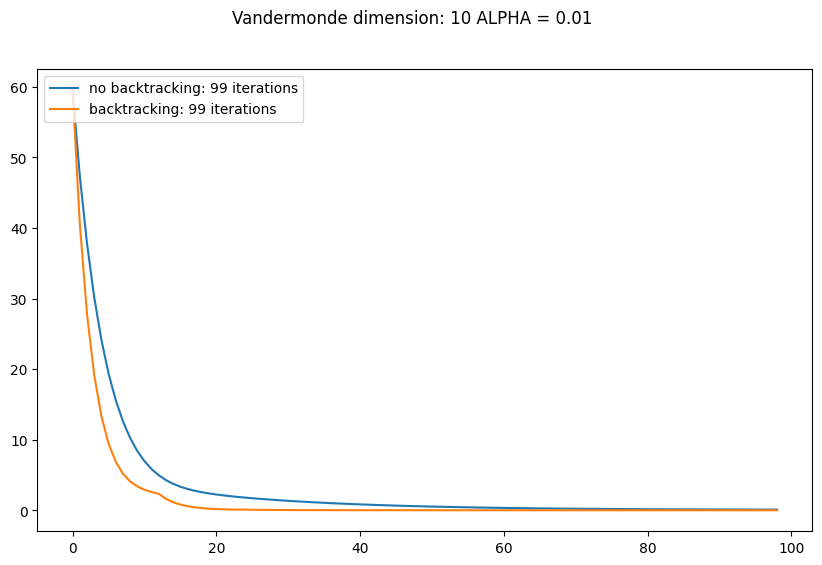

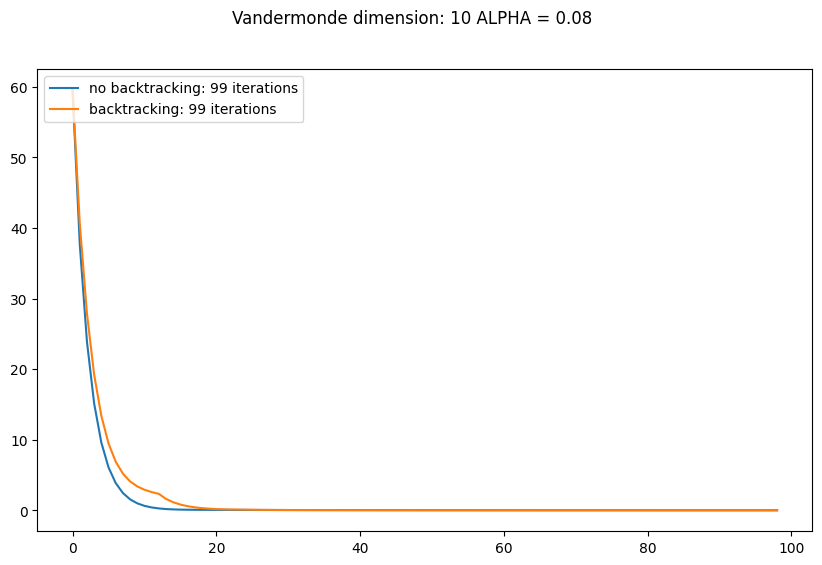

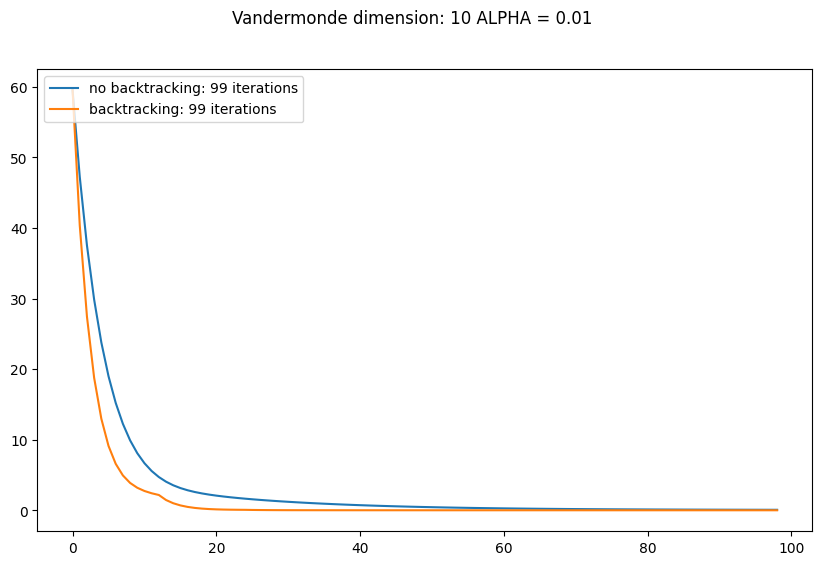

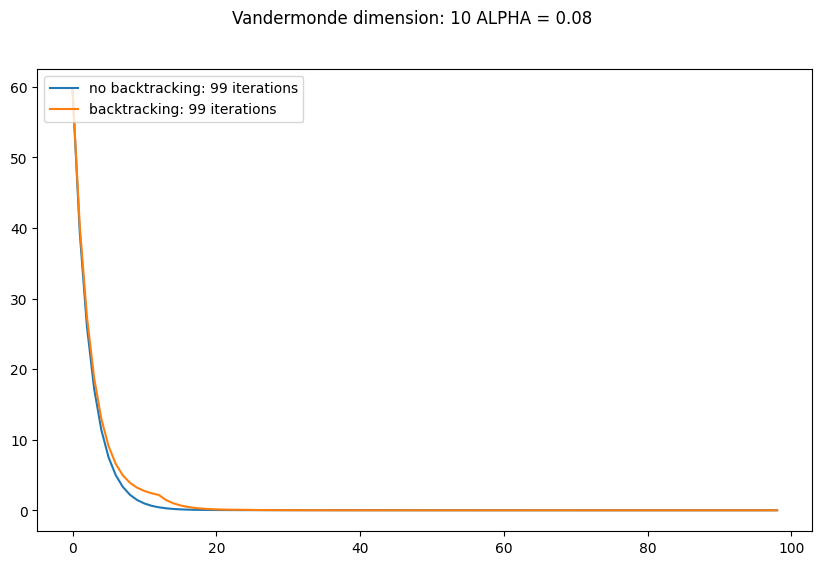

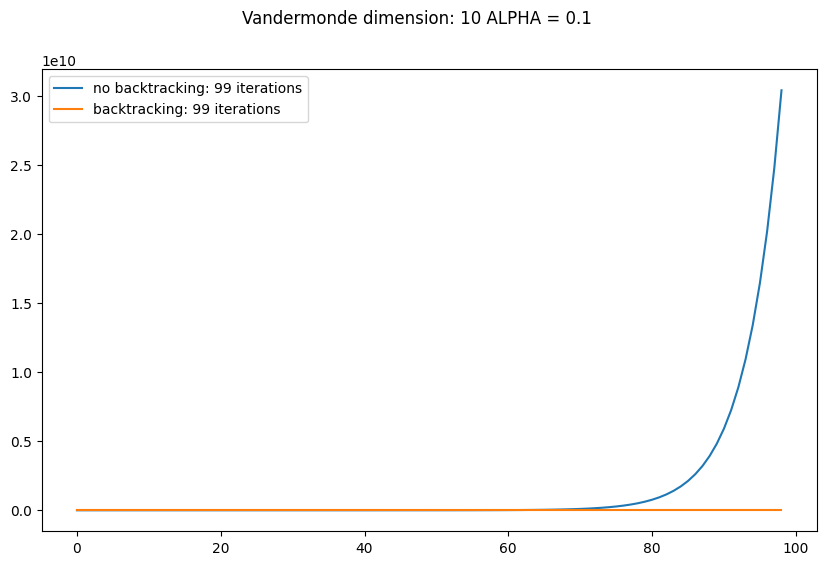

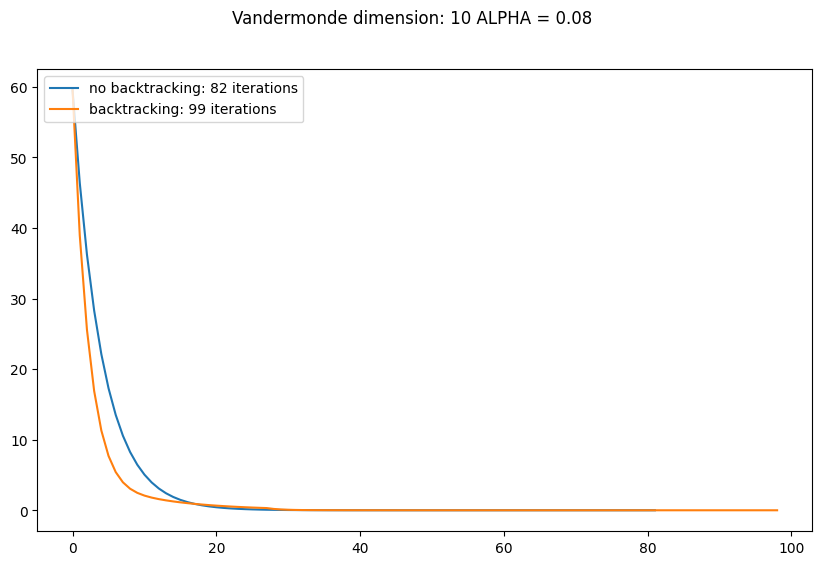

In [179]:

Lambda =  0.05

n=10
v = np.linspace(0,1,n)
A = np.vander(v)
x_true = np.ones((n,))
b = A@x_true


def f4(x):
    return f3(x) + 0.5*Lambda*(x.T @ x)


def grad_f4(x):
    return grad_f3(x) + Lambda * x


print('Lambda: ', Lambda)
plot_vand(f4, grad_f4, n, x_true, 0.01)
plot_vand(f4, grad_f4, n, x_true, 0.08)


Lambda =  0.4

print('Lambda: ', Lambda)
plot_vand(f4, grad_f4, n, x_true, 0.01)
plot_vand(f4, grad_f4, n, x_true, 0.08)


Lambda =  1.9

print('Lambda: ', Lambda)
plot_vand(f4, grad_f4, n, x_true, 0.1)
plot_vand(f4, grad_f4, n, x_true, 0.08)

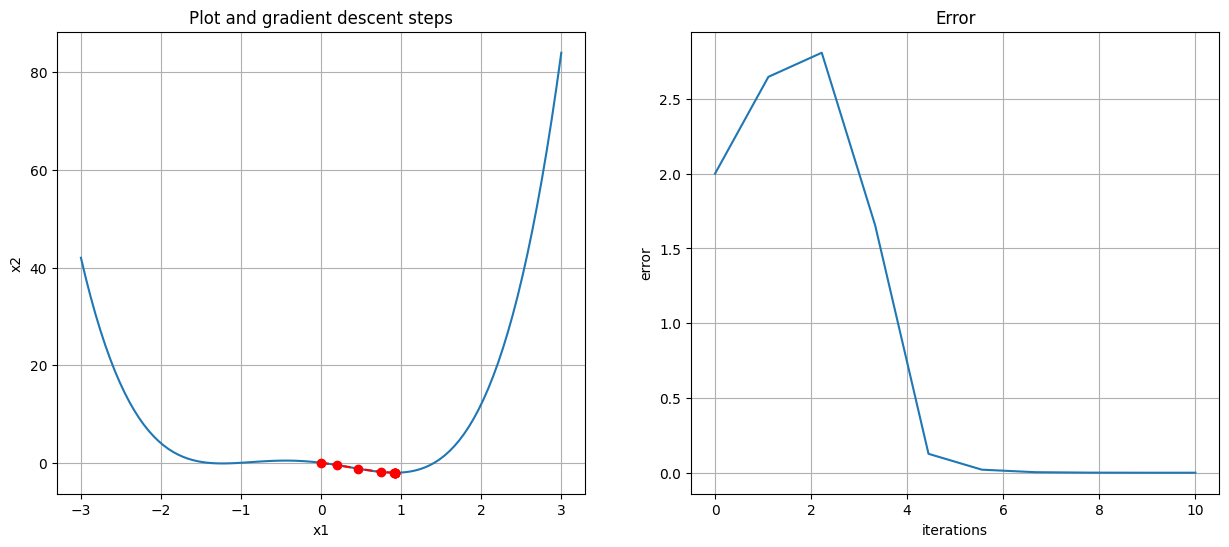

Iterations:  10
solution: [ 0.9222263966908124 -2.037748041480788 ]


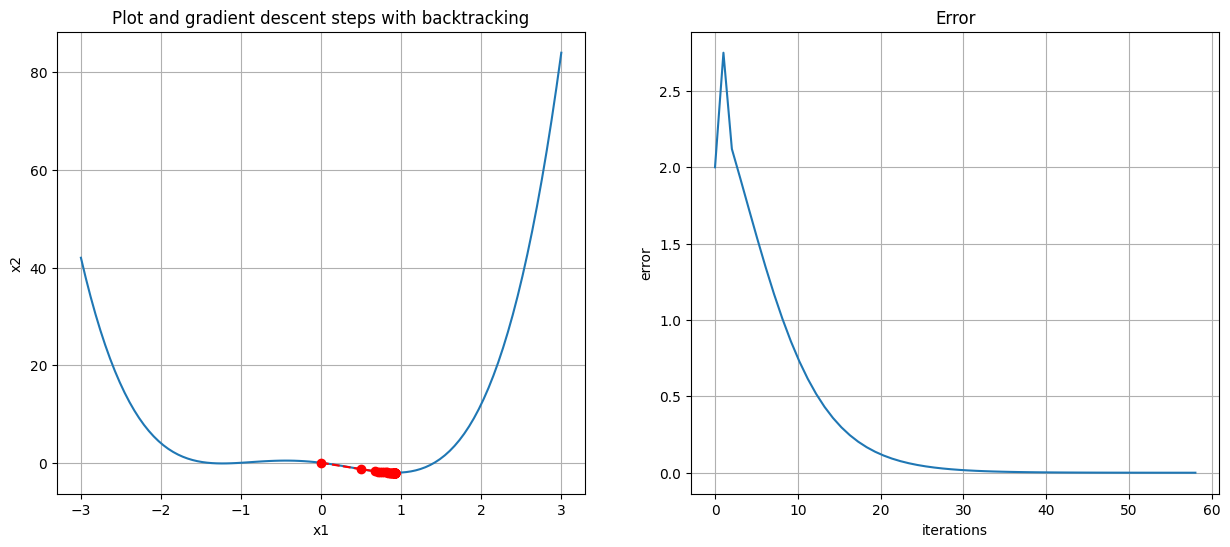

Iterations:  58
solution: [ 0.922219325656556 -2.0377480413204347 ]


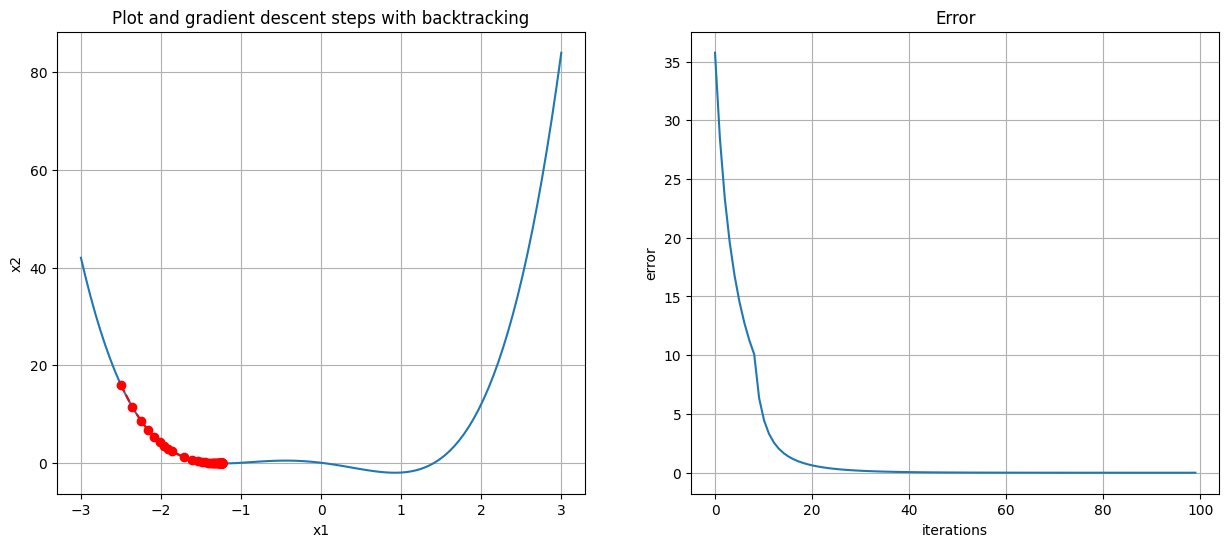

Iterations:  99
solution: [ -1.232249843628181 -0.13781766862162126 ]


In [132]:
def f5(x):
    return x[0]**4 + x[0]**3 - 2*(x[0]**2) - 2*x[0]

def grad_f5(x):
    return 4*(x[0]**3) + 3* (x[0]**2) - 4*x[0] - 2

x0 = [0]
tolf = 1e-6
tolx = 1e-6
maxk = 100
x, k, f_val, grads, err_val = gradient_descent(f5, grad_f5, x0, maxk,tolf, tolx,  backtrack=False, alpha=1e-1)
plot_GD_2D(x, k, f_val, grads, err_val, f5)

x0 = [0]
tolf = 1e-6
tolx = 1e-6
maxk = 100
x, k, f_val, grads, err_val = gradient_descent(f5, grad_f5, x0,maxk, tolf, tolx,  backtrack=True)
plot_GD_2D(x, k, f_val, grads, err_val, f5, back=True)

x0 = [-2.5]
tolf = 1e-6
tolx = 1e-6
maxk = 100
x, k, f_val, grads, err_val = gradient_descent(f5, grad_f5, x0, maxk,tolf, tolx,  backtrack=True)
plot_GD_2D(x, k, f_val, grads, err_val, f5, back=True)